In [1]:
import os
assert 'ASCDS_INSTALL' in os.environ

In [2]:
from sherpa.astro.ui import *
import sys
sys.tracebacklimit=999


In [3]:
from pychips import *
from pychips.hlui import *
from IPython.display import Image

def iprint_window(filename):
    print_window(filename, "export.clobber=True")
    return Image(filename=filename)

In [4]:
from sherpa_contrib.utils import *

In [5]:
dataspace1d(0.5, 8, 0.25)

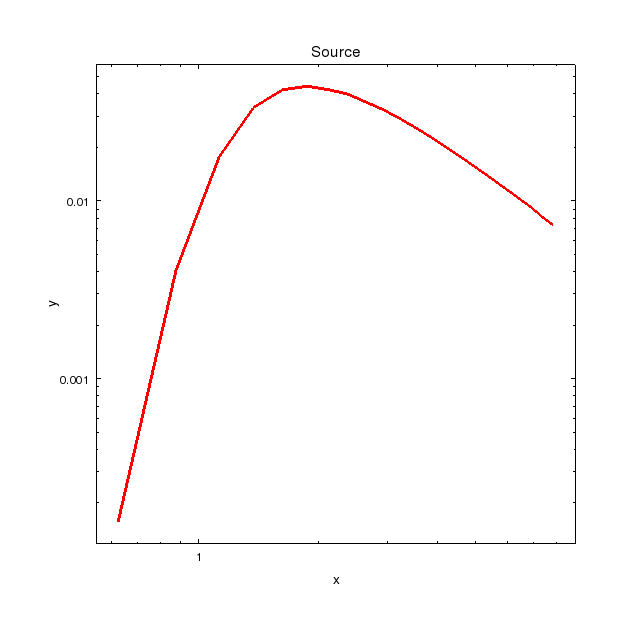

In [6]:
set_source(xsphabs.gal * powlaw1d.pl)
gal.nh = 1.3
pl.gamma = 1.7
plot_source()
log_scale()
iprint_window("sherpa_01.png")

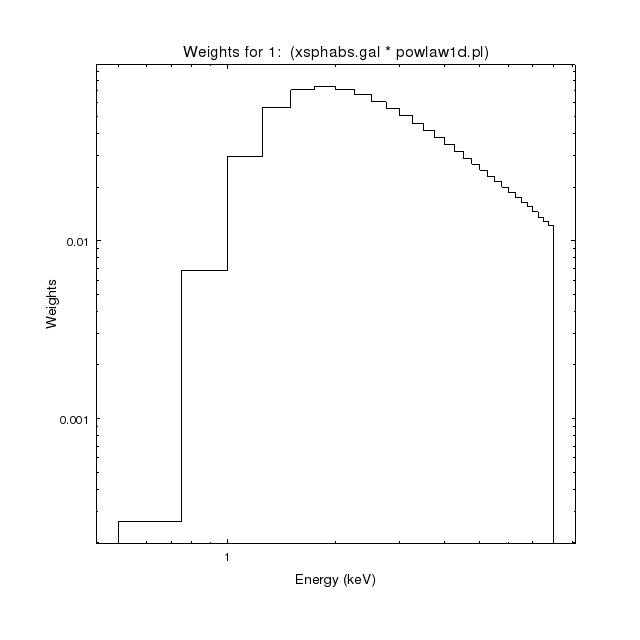

In [7]:
plot_instmap_weights()
log_scale()
iprint_window("sherpa_02.png")

In [8]:
save_instmap_weights("weights.txt",clobber=True)

Created: weights.txt


In [9]:
from ciao_contrib.runtool import dmstat
print(dmstat("weights.txt"))

X
    min:	0.625 	      @:	1 
    max:	7.875 	      @:	30 
   mean:	4.25 
  sigma:	2.1638603621 
    sum:	127.5 
   good:	30 
   null:	0 

WEIGHT
    min:	0.0002622069589 	      @:	1 
    max:	0.074007102386 	      @:	6 
   mean:	0.033333333333 
  sigma:	0.020733677725 
    sum:	1 
   good:	30 
   null:	0


Created: weights2.txt


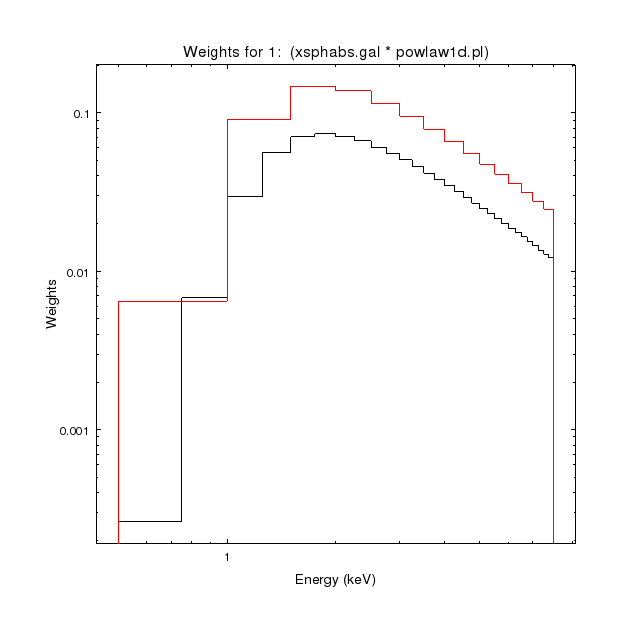

In [10]:
dataspace1d(0.5, 8, 0.5, id=2)
set_source(2, get_source())
plot_instmap_weights(2, overplot=True)
set_histogram(["line.color", "red"])
save_instmap_weights(2, "weights2.txt")
iprint_window('sherpa_03.png')

Created: weights3.txt


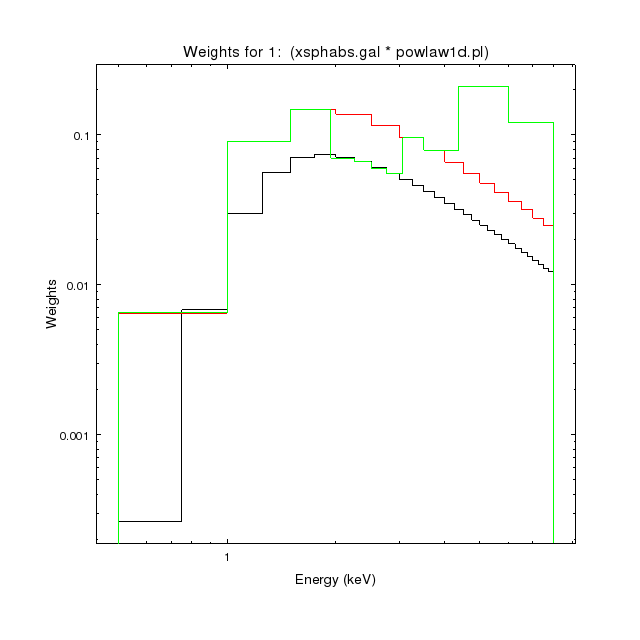

In [11]:
edges = [0.5, 1, 1.5, 2, 2.25, 2.5, 2.75, 3, 3.5, 4, 6, 8]
xe = numpy.asarray(edges)
xlo = xe[:-1]
xhi = xe[1:]
load_arrays(3, xlo, xhi, xlo*0, Data1DInt)
set_source(3, get_source())
plot_instmap_weights(3, overplot=True)
set_histogram(["line.color", "green"])
save_instmap_weights(3, "weights3.txt")
iprint_window("sherpa_04.png")

In [12]:
from ciao_contrib.runtool import specextract
specextract.infile="repro/acisf01838_repro_evt2.fits[sky=circle(4072.7497,4245.7704,10.616561)]"
specextract.outroot="src"
specextract.bkgresp=False
specextract.weight=False
specextract(clobber=True)

Running specextract
Version: 30 November 2016

Using event file repro/acisf01838_repro_evt2.fits[sky=circle(4072.7497,4245.7704,10.616561)]

Aspect solution file repro/pcadf084244404N003_asol1.fits found.

Bad-pixel file repro/acisf01838_repro_bpix1.fits found.

Mask file repro/acisf01838_000N003_msk1.fits found.

Setting bad pixel file 

Extracting src spectra 

Creating src ARF 

Creating src RMF 

Using mkacisrmf...

Grouping src spectrum 

Updating header of src.pi with RESPFILE and ANCRFILE keywords.

Updating header of src_grp.pi with RESPFILE and ANCRFILE keywords.

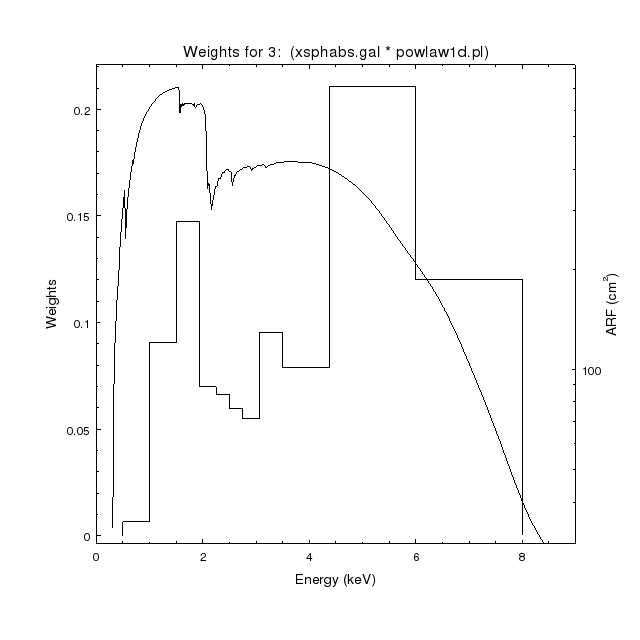

In [13]:
plot_instmap_weights(3)
add_axis(Y_AXIS, 1, 1, 2)

add_curve("src.arf[cols energ_hi,specresp]", ["symbol.style", "none"])
set_plot_ylabel("ARF (cm^2)")
log_scale(Y_AXIS)
limits(Y_AXIS, 30, AUTO)
limits(X_AXIS, 0, 9)
iprint_window("sherpa_05.png")

In [14]:
clear()

----------------
## Compare with chips

In [15]:
from ciao_contrib.runtool import mkinstmap
mkinstmap.pixelgrid="1:1024:#1024,1:1024:#1024"
mkinstmap.obsfile="repro/acisf01838_repro_evt2.fits"
mkinstmap.detsubsys="ACIS-7"
mkinstmap.maskfile="repro/acisf01838_000N003_msk1.fits"

In [16]:
mkinstmap("imap.e1.7.fits", "NONE", "1.7", clobber=True )
mkinstmap("imap.weights.fits", "weights.txt", "1", clobber=True )
mkinstmap("imap.weights2.fits", "weights2.txt", "1", clobber=True )
mkinstmap("imap.weights3.fits", "weights3.txt", "1", clobber=True )


In [17]:
print(dmstat("imap.*.fits", centroid=False, median=True, sigma=False))

File=imap.e1.7.fits
IMAP[cm**2]
    min:	0 	      @:	( 1 1 )
    max:	635.69445801 	      @:	( 212 432 )
   mean:	595.47900202 
 median:	604.57400513 
    sum:	624404990.03 
   good:	1048576 
   null:	0 
File=imap.weights.fits
IMAP[cm**2]
    min:	0 	      @:	( 1 1 )
    max:	417.44134521 	      @:	( 212 425 )
   mean:	384.48974022 
 median:	390.75302124 
    sum:	403166713.84 
   good:	1048576 
   null:	0 
File=imap.weights2.fits
IMAP[cm**2]
    min:	0 	      @:	( 1 1 )
    max:	418.01312256 	      @:	( 212 425 )
   mean:	385.22800201 
 median:	391.45513916 
    sum:	403940837.44 
   good:	1048576 
   null:	0 
File=imap.weights3.fits
IMAP[cm**2]
    min:	0 	      @:	( 1 1 )
    max:	417.4524231 	      @:	( 212 425 )
   mean:	384.18331231 
 median:	390.39666748 
    sum:	402845400.89 
   good:	1048576 
   null:	0


In [18]:
from ciao_contrib.runtool import dmimgcalc, dmstat
dmimgcalc("imap.weights.fits,imap.e1.7.fits", out="ratio1.fits", op="imgout=img1/img2", clob=True)
print(dmstat("ratio1.fits", cen=False, sig=False, med=True))

ratio1.fits
    min:	0.6070933938 	      @:	( 594 624 )
    max:	0.65777701139 	      @:	( 220 2 )
   mean:	0.64552107698 
 median:	0.64624148607 
    sum:	667477.18537 
   good:	1034013 
   null:	14563


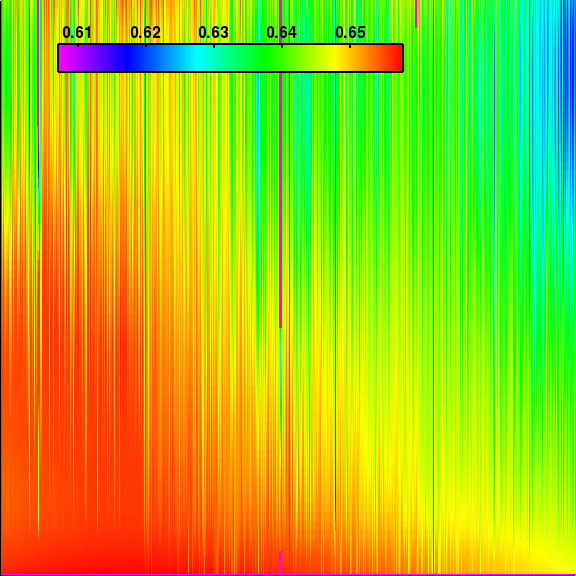

In [19]:
clear()
add_window(8, 8, 'inches')
add_image("ratio1.fits", ["colormap", "rainbow", "axis.pad", 0])
reposition_plot(0, 0, 1, 1)
set_plot(['style', 'open'])
add_colorbar(0.4, 0.9, ["width", 0.05, "length", 0.6])
set_colorbar(["*.color", "black", "*.thickness", 2,
       "ticklabel.size", 16, "ticklabel.fontstyle", "bold"])
iprint_window("chips_01.png")

In [20]:
from ciao_contrib.runtool import dmimgcalc
dmimgcalc("imap.weights2.fits,imap.weights.fits", out="ratio2.fits", op="imgout=img1/img2", clob=True)

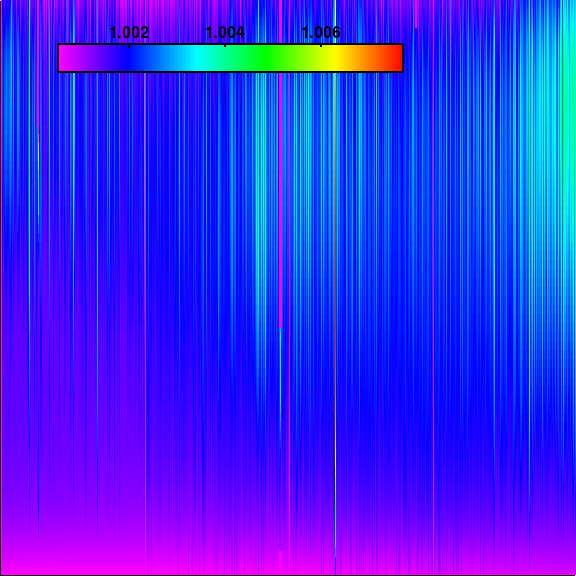

In [21]:
clear()
add_window(8, 8, 'inches')
add_image("ratio2.fits", ["colormap", "rainbow", "axis.pad", 0])
reposition_plot(0, 0, 1, 1)
set_plot(['style', 'open'])
add_colorbar(0.4, 0.9, ["width", 0.05, "length", 0.6])
set_colorbar(["*.color", "black", "*.thickness", 2,
       "ticklabel.size", 16, "ticklabel.fontstyle", "bold"])
iprint_window("chips_02.png")

In [22]:
from ciao_contrib.runtool import dmimgcalc
dmimgcalc("imap.weights3.fits,imap.weights.fits", out="ratio3.fits", op="imgout=img1/img2", clob=True)

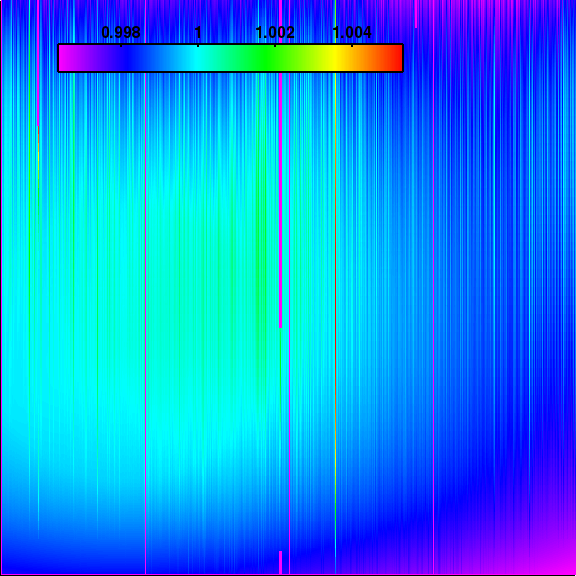

In [23]:
clear()
add_window(8, 8, 'inches')
add_image("ratio3.fits", ["colormap", "rainbow", "axis.pad", 0])
reposition_plot(0, 0, 1, 1)
set_plot(['style', 'open'])
add_colorbar(0.4, 0.9, ["width", 0.05, "length", 0.6])
set_colorbar(["*.color", "black", "*.thickness", 2,
       "ticklabel.size", 16, "ticklabel.fontstyle", "bold"])
iprint_window("chips_03.png")

---

## expmaps


In [24]:
from ciao_contrib.runtool import asphist
asphist.infile="repro/pcadf084244404N003_asol1.fits"
asphist.evtfile="repro/acisf01838_repro_evt2.fits"
asphist.outfile="7.asphist"
asphist(clob=True)

In [25]:
from ciao_contrib.runtool import mkexpmap

mkexpmap.asphistf="7.asphist"
mkexpmap.xygrid="3643.1:4723.1:#1080,3853.4:4933.4:#1080"
mkexpmap.normalize=False
mkexpmap(instmap="imap.e1.7.fits",outf="emap.e1.7.fits", clob=True)
mkexpmap(instmap="imap.weights.fits",outf="emap.weights.fits", clob=True)

In [26]:
from ciao_contrib.runtool import dmimgcalc
dmimgcalc("emap.weights.fits,emap.e1.7.fits", outf="emap.ratio.fits", op="imgout=img1/img2", clob=True)

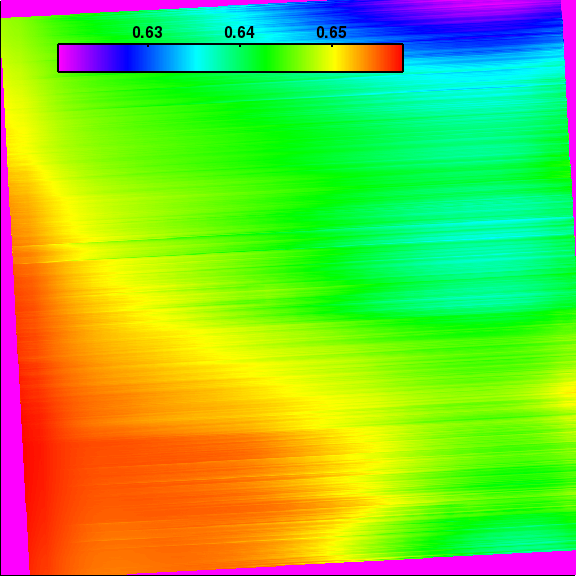

In [27]:
clear()
add_window(8, 8, 'inches')
add_image("emap.ratio.fits", ["colormap", "rainbow", "axis.pad", 0])
reposition_plot(0, 0, 1, 1)
set_plot(['style', 'open'])
add_colorbar(0.4, 0.9, ["width", 0.05, "length", 0.6])
set_colorbar(["*.color", "black", "*.thickness", 2,
       "ticklabel.size", 16, "ticklabel.fontstyle", "bold"])
iprint_window("chips_04.png")

In [28]:
from ciao_contrib.utils import *
from pycrates import read_file, get_piximgvals

r1 = read_file("ratio1.fits")
r2 = read_file("ratio2.fits")
r3 = read_file("ratio3.fits")
re = read_file("emap.ratio.fits")

i1 = get_piximgvals(r1)
i2 = get_piximgvals(r2)
i3 = get_piximgvals(r3)
ie = get_piximgvals(re)

ix1 = np.where(i1 > 0)
ix2 = np.where(i2 > 0)
ix3 = np.where(i3 > 0)
ixe = np.where(ie > 0)

h1 = simple_hist(i1[ix1], nbins=20)
h2 = simple_hist(i2[ix2], nbins=20)
h3 = simple_hist(i3[ix3], nbins=20)
he = simple_hist(ie[ixe], nbins=20)

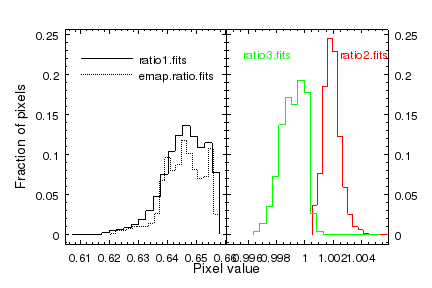

In [29]:
clear()
add_window(6, 4, 'inches')

add_histogram(h1.xlow, h1.xhigh, h1.y * 1.0 / h1.y.sum())
add_histogram(he.xlow, he.xhigh, he.y * 1.0 / he.y.sum())
set_histogram(["line.style", "dot"])
set_plot_ylabel("Fraction of pixels")

split(1,2)

add_histogram(h2.xlow, h2.xhigh, h2.y * 1.0 / h2.y.sum())
set_histogram(["line.color", "red"])
add_histogram(h3.xlow, h3.xhigh, h3.y * 1.0 / h3.y.sum())
set_histogram(["line.color", "green"])

bind_axes("plot2", "ay1", "plot1", "ay1")
set_yaxis(["ticklabel.visible", False])
set_yaxis("by2", ["ticklabel.visible", True])

limits(X_AXIS, 0.9945, 1.0059)
add_label(1.0025, 0.22, "ratio2.fits", ["color", "red"])
add_label(0.999, 0.22, "ratio3.fits", ["color", "green", "halign", 1])

current_plot("plot1")

add_line(0.61, 0.22, 0.628, 0.22)
add_label(0.63, 0.22, "ratio1.fits", ["valign", 0.5])
add_line(0.61, 0.2, 0.628, 0.2, ["style", "dot"])
add_label(0.63, 0.2, "emap.ratio.fits", ["valign", 0.5])

x1 = get_plot("plot1").leftmargin
x2 = 1 - get_plot("plot2").rightmargin
add_label(0.5*(x1+x2), 0.05, "Pixel value", ["size", 14, "coordsys", "FRAME_NORM", "halign", 0.5])
iprint_window("chips_05.png")

In [30]:
clear()